In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
chain = np.load('../runs/chain_spotmodel_1_bmlnlike.npy')

19920.835649906105 1482.8622914572654


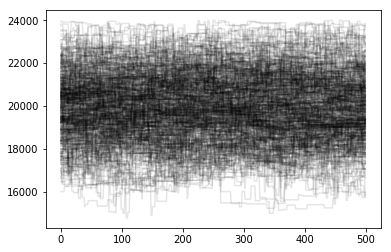

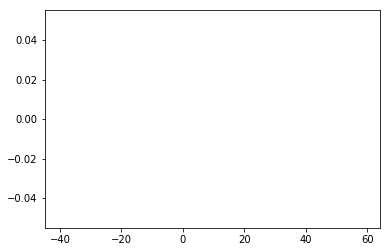

In [115]:
i = 0
clip = 2500
plt.plot(chain[0:,clip:,i].T, 'k', alpha=0.1)
print(np.median(chain[:,clip:,i]), np.std(chain[:,clip:,i]))
plt.show()

plt.hist(chain[:,clip:,i].flatten(), np.arange(-40,60, 1))
plt.show()

In [104]:
param = chain[:,clip:,i].flatten()
lp = len(param)

boundvals = 10-15, 10+11
len(param[(param < boundvals[1]) & (param > boundvals[0])])/lp

1.0

In [105]:
sc = np.shape(chain)
clip = 2000
igburn = chain[:,clip:,:].flatten().reshape(sc[0]*(sc[1]-clip),sc[2])

si = np.shape(igburn)
rand = np.random.randint(0, si[0], 100)

In [106]:
from scipy.interpolate import interp1d


In [107]:
import starry
time, vels, verr = np.loadtxt('../data/vst222259.ascii', usecols=[1,2,3], unpack=True)

time = time[:-4]
vels = vels[:-4]
verr = verr[:-4]

time -= 18706.5

#time -= 2458706.5
map = starry.Map(ydeg=4, udeg=2, rv=True, lazy=False)
map.reset()

Prot = 2.85             # days
P = 8.1387              # days
e = 0.0
w = 0.0
inc = 90.0

tuse = time + 0.0
euse = verr + 0.0
vuse = vels + 0.0

def rmcurve(tarr, params):
    
    
    vsini, r, b, a, u1, u2, obl, gamma, jitter_good, jitter_bad, q, t0, spot_amp, spot_sig, spot_lon, spot_lat = params
    veq = vsini / np.sin(inc * np.pi / 180.0)
    
    map.reset()

    map.inc = inc
    map.obl = obl
    #map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
    map[1:] = [u1, u2]
    map.veq = veq

    map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=spot_lat)

    f = (tarr - t0)/P*2*np.pi
    I = np.arccos(b/a)

    zo = a*np.cos(f) 
    yo = -a*np.sin(np.pi/2+f)*np.cos(I)
    xo = a*np.sin(f)*np.sin(I)


    theta = 360.0 / Prot * tarr

    rv_0 = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)

    rv = rv_0 + gamma
    
    return rv, gamma

In [108]:
def rmcurve_mm(tarr, params):
    


    vsini, r, b, a, u1, u2, obl, gamma, jitter_good, jitter_bad, q, t0, spot_amp, spot_sig, spot_lon, spot_lat = params
    veq = vsini / np.sin(inc * np.pi / 180.0)
    
    map.reset()

    map.inc = inc
    map.obl = obl
    #map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
    map[1:] = [u1, u2]
    map.veq = veq


    f = (tarr - t0)/P*2*np.pi
    I = np.arccos(b/a)

    zo = a*np.cos(f) 
    yo = -a*np.sin(np.pi/2+f)*np.cos(I)
    xo = a*np.sin(f)*np.sin(I)


    theta = 360.0 / Prot * tarr

    rv_1 = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
    map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=spot_lat)
    rv_0 = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
    
    rv = rv_0 + gamma
    
    map.reset()
    map.inc = inc
    map.obl = obl
    #map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
    map[1:] = [u1, u2]
    map.veq = veq
    #rv_0 = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
    

    
    
    return rv, rv_1, rv_0 + gamma - rv_1

In [109]:
tarr = np.arange(0, 0.5, 0.001)
rv_out = np.zeros((100, len(tarr)))
trend_out = np.zeros((100, len(tarr)))
rv0_out = np.zeros((100, len(tarr)))

for i in range(100):
    rv_out[i], trend_out[i], rv0_out[i] = rmcurve_mm(tarr, igburn[rand[i]])

Compiling `rv`... Done.
Compiling `add_spot`... Done.


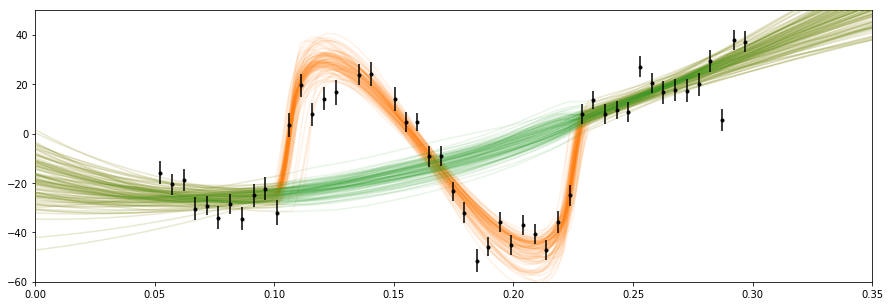

In [111]:
plt.figure(figsize=(15,5))

plt.plot(tarr, rv_out.T, 'C1', alpha=0.1, zorder=3)
plt.plot(tarr, rv0_out.T, 'C2', alpha=0.1, zorder=3)
#plt.plot(tarr, trend_out.T, 'C3', alpha=0.1, zorder=3)

plt.errorbar(time, vels, yerr=verr, fmt='k.', zorder=5)


plt.ylim(-60, 50)
plt.xlim(0.0, 0.35)

plt.show()
